In [49]:
using DifferentialEquations
using Plots

In [50]:
function DDOL_1modules(du,u,p,t)
    
    v0,v1 = u
    bA,n,umax,G,r,D,cA,dA = p
    v_populations = [ v0 , v1 ]
    total_pop = sum( v_populations )

    u_0 = ( umax * G ) / ( 1.0 + ( 0 * bA ) ^ n )
    u_1 = ( umax * G ) / ( 1.0 + ( 1 * bA ) ^ n )

    v0_growth = u_0 * v0 * ( 1.0 - ( total_pop / r ) ) - D * v0
    v1_growth = u_1 * v1 * ( 1.0 - ( total_pop / r ) ) - D * v1
    
    modA = cA * ( v1 )

    v0_conjugation = - ( modA * v0 ) + ( dA * v1 ) 
    v1_conjugation = + ( modA * v0 ) - ( dA * v1 )

    du[1] = dv0 = v0_conjugation + v0_growth
    du[2] = dv1 = v1_conjugation + v1_growth

end

function monoculture_with_dual_selection(du,u,p,t)
    vM = u[1]
    burden,n,umax,G,r,D = p
    
    u_M = ( umax * G ) / ( 1.0 + ( burden ) ^ n )
    
    vM_growth = u_M * vM * ( 1.0 - ( vM / r ) ) - D * vM

    du[1] = dvM = vM_growth
end

persistence_potential(c,umax,D,d,b) = c / ( ( umax / (umax - D) ) * ( D + d - D / (1 + b) ) )

persistence_potential (generic function with 1 method)

In [51]:
total_burden = 4

c_range = 0:0.002:0.1
avg_c = 0.1

avg_umax = 1

D_range = 0:0.001:0.1
avg_D = 0.02

dilution_rates = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07]

d_range = 0:0.001:1
avg_d = 1e-3

b_range = 0:0.1:15
avg_b = 1

n_range = 1:0.01:10
avg_n = 3

G_range = 0:0.01:1
avg_G = 1

avg_r = 1

simulation_time = 200

200

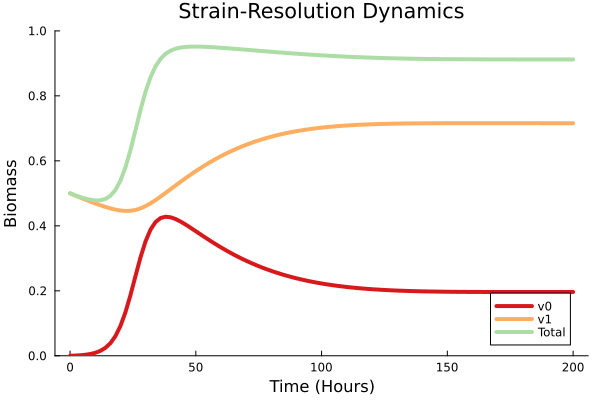

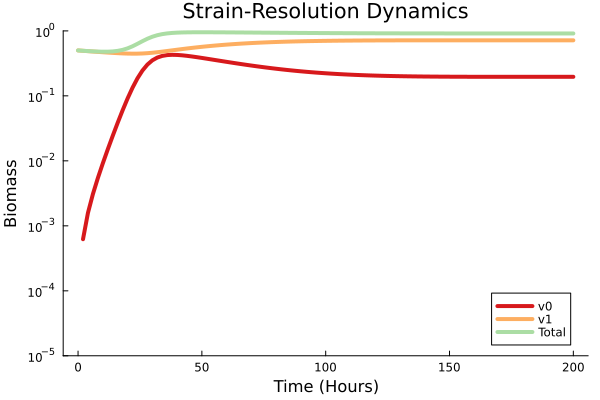

Estimated Persistance Potential of Plasmid A: 5.76470588235294


In [58]:
# Initial conditions and parameter values
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)


bA = total_burden

n = avg_n
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D
dA = avg_d
dB = avg_d
cA = avg_c
cB = avg_c

# u = [v0,v1]
u0 = [0,0.5] # Initial values for S0, S1

# p = (bA, n, umax, G, r, D, cA, dA)
p = [  bA, n, umax, G, r, D, cA, dA ] # Parameters: bA,n,umax,G,r,D,cA,dA
 
bA,n,umax,G,r,D,cA,dA = p

persistence_potential_A = persistence_potential(cA,umax,D,dA,bA)
println("Estimated Persistance Potential of Plasmid A: $persistence_potential_A" )


time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP

# Time span for integration
tspan = (0.0, tspan_end)  # Start and end times for integration

# Define the ODE problem
prob = ODEProblem(DDOL_1modules, u0, tspan, p)

# Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
solver = Tsit5()

# Solve the ODE problem
sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

population_volumes = (sol[1, :]/r,sol[2, :]/r)
total_biomass = sum(population_volumes)
productive_biomass = total_biomass - sol[1, :]/r
module_A = sol[2, :]/r

# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_4, linewidth=4)

dynamics_plot = plot()

plot!(sol.t/dP, sol[1, :]/r, label="v0")
plot!(sol.t/dP, sol[2, :]/r, label="v1")

plot!(sol.t/dP, total_biomass, label="Total")


xlabel!("Time (Hours)")
ylabel!("Biomass")
title!("Strain-Resolution Dynamics")
plot!(legend=:bottomright)
plot!(grid=:false)
plot!(ylim=(0,1))
display(dynamics_plot)

#savefig(dynamics_plot,"strain_resolution_dynamics.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))
display(dynamics_plot)

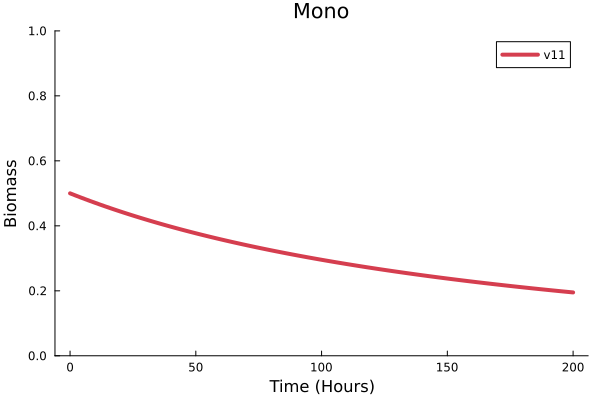

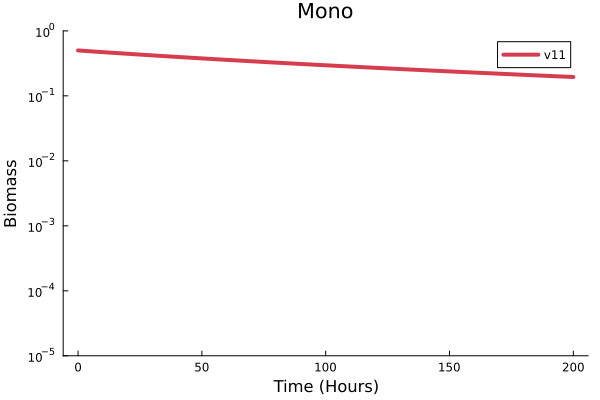

In [53]:
# Initial conditions and parameter values
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)

# u = [v11]
u0 = [0.5] # Initial values for v11

# p = (bA, bB, n, umax, G, r, D, cA, cB, dA, dB)
p = [  total_burden, n, umax, G, r, D] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
 

time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP

# Time span for integration
tspan = (0.0, tspan_end)  # Start and end times for integration

# Define the ODE problem
prob = ODEProblem(monoculture_with_dual_selection, u0, tspan, p)

# Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
solver = Tsit5()

# Solve the ODE problem
sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_8, linewidth=4)

dynamics_plot = plot()

plot!(sol.t/dP, sol[1, :]/r, label="v1")

xlabel!("Time (Hours)")
ylabel!("Biomass")
title!("Mono")
plot!(legend=:topright)
plot!(grid=:false)
plot!(ylim=(0,1))
display(dynamics_plot)

#savefig(dynamics_plot,"Mono.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))
display(dynamics_plot)

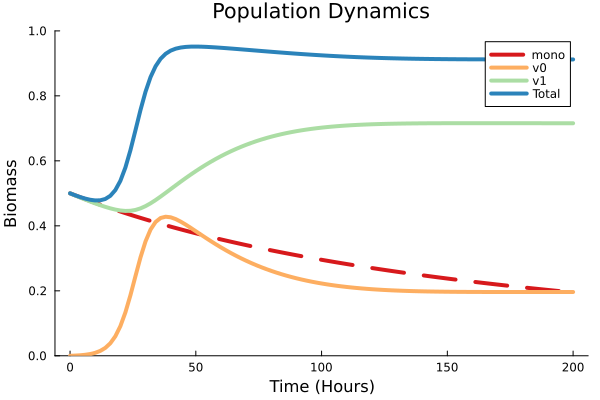

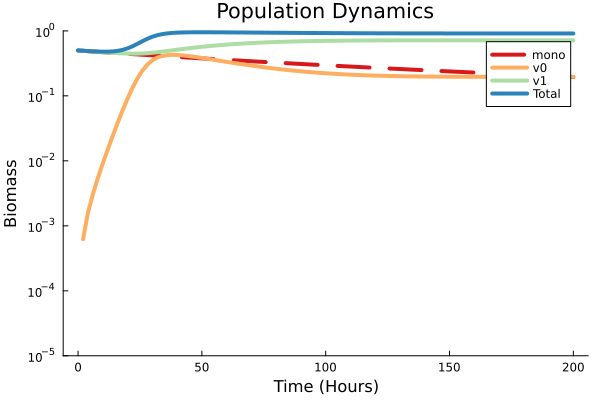

Estimated Persistance Potential of Plasmid A: 5.76470588235294


In [73]:
bA = total_burden

n = avg_n
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D
dA = avg_d
dB = avg_d
cA = avg_c
cB = avg_c


# Initial conditions and parameter values
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)

# u = [v11]
u0 = [0.5] # Initial values for v11

# p = (bA, bB, n, umax, G, r, D, cA, cB, dA, dB)
p = [  total_burden, n, umax, G, r, D] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
 

time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP

# Time span for integration
tspan = (0.0, tspan_end)  # Start and end times for integration

# Define the ODE problem
prob = ODEProblem(monoculture_with_dual_selection, u0, tspan, p)

# Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
solver = Tsit5()

# Solve the ODE problem
sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_4, linewidth=4)

mono = sol[1, :]/r

dynamics_plot = plot()
plot!(sol.t/dP, mono, label="mono", linestyle=:dash)
# Initial conditions and parameter values
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)


# u = [v0,v1]
u0 = [0,0.5] # Initial values for S0, S1

# p = (bA, n, umax, G, r, D, cA, dA)
p = [  bA, n, umax, G, r, D, cA, dA ] # Parameters: bA,n,umax,G,r,D,cA,dA
 
bA,n,umax,G,r,D,cA,dA = p

persistence_potential_A = persistence_potential(cA,umax,D,dA,bA)
println("Estimated Persistance Potential of Plasmid A: $persistence_potential_A" )


time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP

# Time span for integration
tspan = (0.0, tspan_end)  # Start and end times for integration

# Define the ODE problem
prob = ODEProblem(DDOL_1modules, u0, tspan, p)

# Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
solver = Tsit5()

# Solve the ODE problem
sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

population_volumes = (sol[1, :]/r,sol[2, :]/r)
total_biomass = sum(population_volumes)
productive_biomass = total_biomass - sol[1, :]/r
module_A = sol[2, :]/r



plot!(sol.t/dP, sol[1, :]/r, label="v0")
plot!(sol.t/dP, sol[2, :]/r, label="v1")

plot!(sol.t/dP, total_biomass, label="Total")




xlabel!("Time (Hours)")
ylabel!("Biomass")
title!("Population Dynamics")
plot!(legend=:topright)
plot!(grid=:false)
plot!(ylim=(0,1))
display(dynamics_plot)

#savefig(dynamics_plot,"fig6_pop_dynamics.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))
display(dynamics_plot)

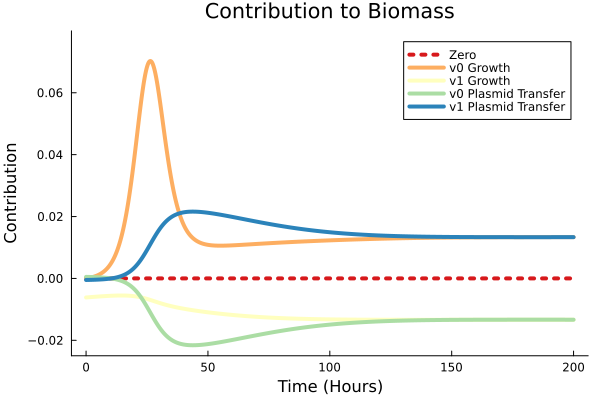

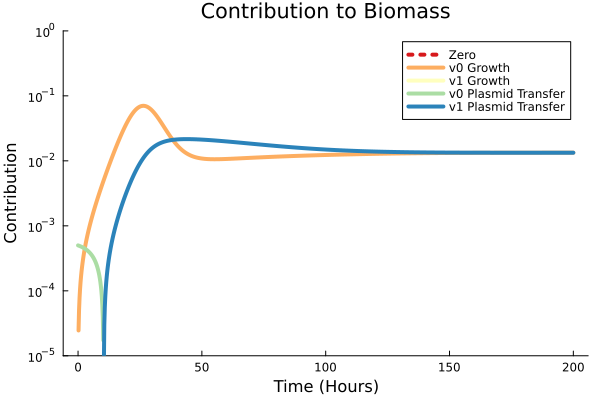

Estimated Persistance Potential of Plasmid A: 5.76470588235294


In [75]:
# Initial conditions and parameter values
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)


bA = total_burden


n = avg_n
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D
dA = avg_d

cA = avg_c


# u = [v00,v10, v01, v11]
u0 = [0,0.5] # Initial values for S0, S1, S2, S3

# p = (bA, n, umax, G, r, D, cA, dA)
p = [  bA, n, umax, G, r, D, cA, dA] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB
 
bA,n,umax,G,r,D,cA,dA = p

persistence_potential_A = persistence_potential(cA,umax,D,dA,bA)
println("Estimated Persistance Potential of Plasmid A: $persistence_potential_A" )


time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP

# Time span for integration
tspan = (0.0, tspan_end)  # Start and end times for integration

# Define the ODE problem
prob = ODEProblem(DDOL_1modules, u0, tspan, p)

# Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
solver = Tsit5()

# Solve the ODE problem
sol = solve(prob, solver, saveat=0.1);  # Here, we specify `saveat` for regular time intervals.

v0 = sol[1, :]/r
v1 = sol[2, :]/r

v_populations = [ v0 , v1]
total_pop = sum( v_populations )

u_0 = ( umax * G ) / ( 1.0 + ( 0 * bA ) ^ n )
u_1 = ( umax * G ) / ( 1.0 + ( 1 * bA ) ^ n )


v0_growth = u_0 .* v0 .* ( 1.0 .- ( total_pop ./ r ) ) - D .* v0
v1_growth = u_1 .* v1 .* ( 1.0 .- ( total_pop ./ r ) ) - D .* v1

    
modA = cA .* ( v1 )

    
v0_conjugation = ( - ( modA .* v0 ) + ( dA .* v1 ) )
v1_conjugation = ( + ( modA .* v0 ) - ( dA .* v1 ) )


zero_line = zeros(length(sol.t))

# Create the publication-quality plot using native Julia plotting
gr(linecolor=:auto,color_palette=:Spectral_5, linewidth=4, linealpha=1)

dynamics_contributions_c = plot()

plot!(sol.t/dP, zero_line, label="Zero", linestyle=:dot)

plot!(sol.t/dP, v0_growth, label="v0 Growth")
plot!(sol.t/dP, v1_growth, label="v1 Growth")

#plot!(sol.t/dP, total_growth, label="Total Growth")

plot!(sol.t/dP, v0_conjugation, label="v0 Plasmid Transfer")
plot!(sol.t/dP, v1_conjugation, label="v1 Plasmid Transfer")




xlabel!("Time (Hours)")
ylabel!("Contribution")
title!("Contribution to Biomass")
plot!(legend=:topright)
plot!(grid=:false)
plot!(ylim=(-0.025,0.08))
display(dynamics_contributions_c)

#savefig(dynamics_contributions_c,"fig6_dynamics_contributions.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))
display(dynamics_contributions_c)